# **Business Running Case: Evaluating Personal Job Market Prospects in 2024**

---

# **📌 Introduction**


In this project, we analyzed the "lightcast_job_postings.csv" dataset, which contains detailed job market information, including job titles, companies, locations, salaries, and various metadata. The dataset initially comprised 131 columns, offering a comprehensive view of job postings and associated attributes for evaluating personal job market prospects in 2024.

In [4]:
import pandas as pd
import plotly.express as px
import missingno as msno
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import us

In [5]:
#| eval: true
#| echo: false

df = pd.read_csv("lightcast_job_postings.csv")

/tmp/ipykernel_4593/3047231268.py:1: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lightcast_job_postings.csv")


In [6]:
#| eval: true
#| echo: false

df.head()

,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/8/2024,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,8/2/2024,2024-08-02 17:08:58.838 Z,0.0,6/2/2024,8/1/2024,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56.0,Administrative and Support and Waste Managemen...,561.0,Administrative and Support Services,5613.0,Employment Services,56132.0,Temporary Help Services,561320.0,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/7/2024,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52.0,Finance and Insurance,524.0,Insurance Carriers and Related Activities,5242.0,"Agencies, Brokerages, and Other Insurance Rela...",52429.0,Other Insurance Related Activities,524291.0,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/20/2024,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52.0,Finance and Insurance,522.0,Credit Intermediation and Related Activities,5221.0,Depository Credit Intermediation,52211.0,Commercial Banking,522110.0,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,6/19/2024,2024-06-19 07:00:00.000 Z,0.0,6/2/2024,6/17/2024,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99.0,Unclassified Industry,999.0,Unclassified Industry,9999.0,Unclassified Industry,99999.0,Unclassified Industry,999999.0,Unclassified Industry


In [7]:
print(df.shape)

(72498, 131)


# **📌 Data Cleaning & Preprocessing**

In [8]:
#| eval: true
#| echo: false

columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_5"
]
df.drop(columns=columns_to_drop, inplace=True)

**To prepare the dataset for analysis, we undertook a thorough data cleaning and preprocessing process, including:**

1. **Dropping Irrelevant Columns:**

- We removed columns that were either redundant or not relevant to our analysis. These included unique identifiers (ID), URLs of job postings (URL, ACTIVE_URLS), and columns providing less granular versions of NAICS and SOC codes (NAICS2, SOC_3, etc.).
- The rationale for dropping these columns was to enhance data efficiency and clarity, reduce the dataset size, and focus on the most granular and meaningful data.

<Axes: >

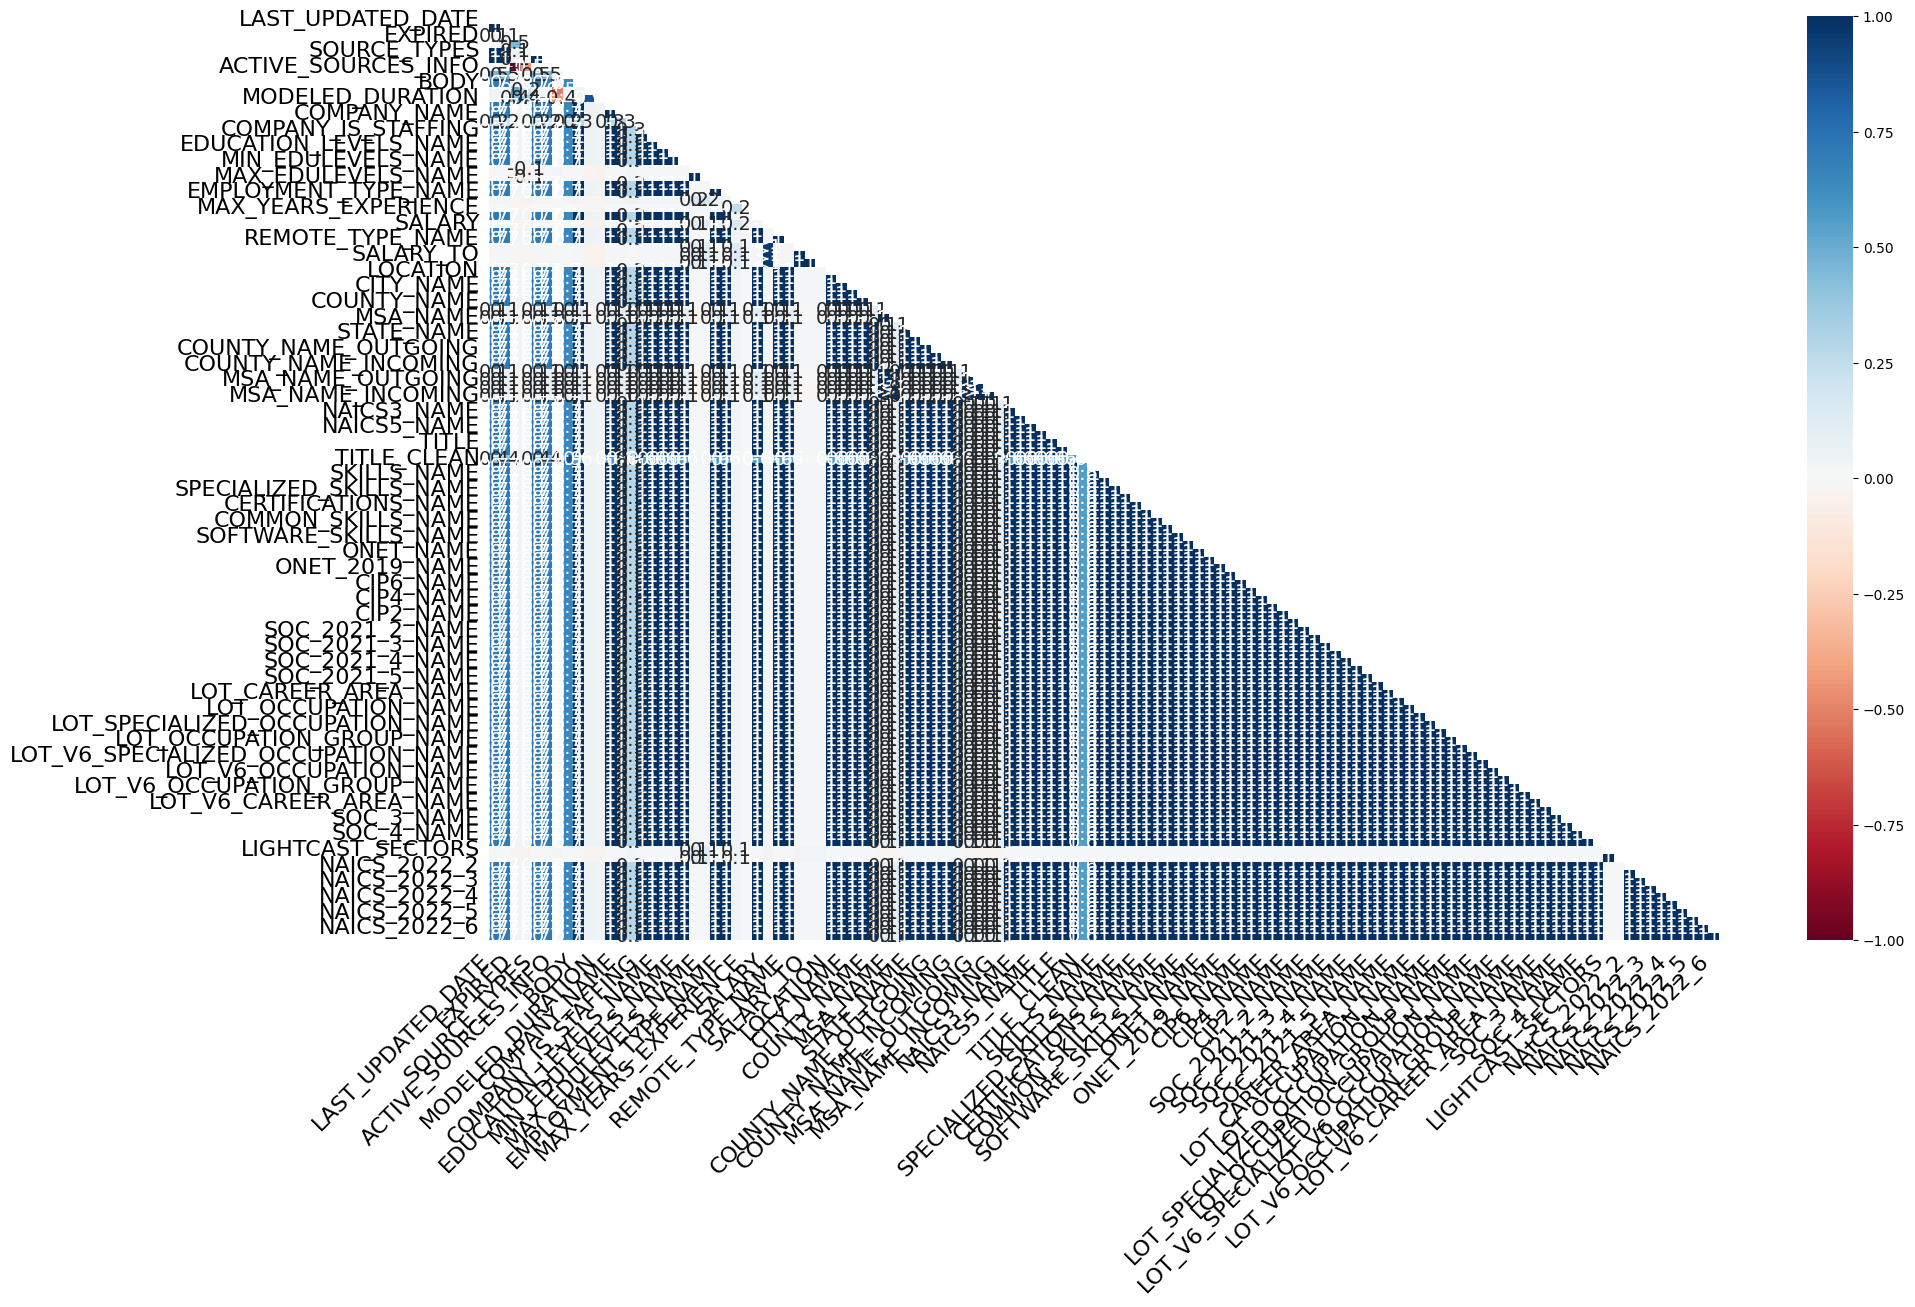

In [9]:
#| eval: true
#| echo: false

# Visualize missing data
msno.heatmap(df)

In [10]:
#| eval: true
#| echo: false


# Drop columns with >50% missing values
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

# Fill missing values safely
df["NAICS_2022_6"] = df["NAICS_2022_6"].fillna(df["NAICS_2022_6"].median())
df["NAICS_2022_6_NAME"] = df["NAICS_2022_6_NAME"].fillna("Unknown")


2. **Handling Missing Values:**

- As seen in the heatmap above, it reveals that the columns
ACTIVE_SOURCES_INFO, MODELED_DURATION, and MODELED_EXPIRED contain significant missing values, suggesting potential data collection or extraction issues. Notably, DURATION and EXPIRED exhibit a moderate positive correlation (0.5), indicating that longer job durations might influence missingness in related columns. 
- Additionally, ACTIVE_SOURCES_INFO shows a strong negative correlation with other variables, implying a pattern where missing data in this column might coincide with gaps in others. 
- In contrast, columns like MSA, MSA_NAME, and LIGHTCAST_SECTORS have no missing values, providing a reliable foundation for further analysis. Addressing missing data in correlated columns through targeted imputation can prevent bias and enhance the accuracy of our analysis.

In [11]:
#| eval: true
#| echo: false

df = df.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

3. **Removing Duplicates:**

- To maintain unique job postings, duplicates were removed based on job title,
company, location, and posting date.
- This ensured that each job opportunity was only represented once, preventing
skewed analysis results.

# Impact of Data Cleaning

The data cleaning process resulted in a more streamlined and manageable dataset, eliminating redundancy and potential inconsistencies. This step set the foundation for accurate and insightful analysis in the subsequent phases of the project.

---